<a href="https://colab.research.google.com/github/boucher-broderick/Ml_AI/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction

This project aims to tackle the challenge of classifying images from the CIFAR-10 dataset, a standard benchmark in machine learning for object recognition across ten categories. We will utilize convolutional neural networks (CNNs) for their effectiveness in image processing tasks and explore transfer learning as a strategy to leverage existing knowledge and improve classification performance without specifying models. Additionally, the project will examine the role of data augmentation in enhancing model accuracy by introducing variability into the training data. Further, we'll explore generative models, including Variational Autoencoders (VAEs) and Generative Adversarial Networks (GANs), to generate synthetic images that could potentially expand our dataset or offer new insights into image generation techniques. The goal is to evaluate and compare these approaches in terms of their efficiency and accuracy in classifying and generating images, contributing to the broader understanding of machine learning applications in image recognition.

#Task 1

In [11]:
! pip install kaggle
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 80.3 MB/s eta 0:00:00


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
!cp /content/drive/MyDrive/MLandAI/kaggle.json ~/.kaggle/kaggle.json
!kaggle competitions download -c cifar-10



y
 97% 695M/715M [00:05<00:00, 216MB/s]
100% 715M/715M [00:05<00:00, 139MB/s]


In [36]:
! unzip cifar-10.zip

Archive:  cifar-10.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sampleSubmission.csv    
replace test.7z? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.7z                 y

replace train.7z? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: train.7z                
replace trainLabels.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: trainLabels.csv         


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

In [42]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [43]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

X_train_normalized = X_train / 255.
X_test_normalized = X_test / 255.

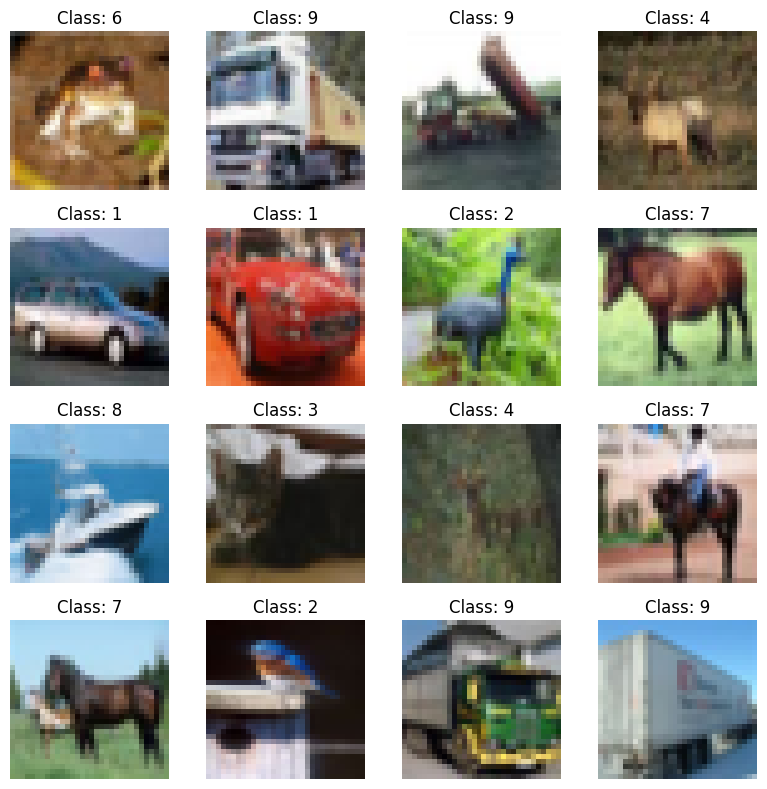

In [50]:
num_images_to_display = 16
plt.figure(figsize=(8, 8))
for i in range(num_images_to_display):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(X_train_normalized[i])
    plt.title(f"Class: {np.argmax(y_train_binary[i])}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# Part 1
The convolutional neural network (CNN) designed for the CIFAR-10 dataset, featuring 32x32 color images, employs a specific architecture pattern to efficiently handle the dataset's complexity and size. The model starts with convolutional layers using small 3x3 kernels, ideal for capturing detailed features in the small images without excessive computation. It gradually increases the number of filters from 32 to 64, allowing for a richer representation of features as the network delves deeper. This setup, coupled with MaxPooling layers to reduce spatial dimensions and computational cost, ensures a balance between depth and efficiency. The increasing filter count and inclusion of pooling are strategic choices to learn complex patterns while managing computational demands, making this architecture well-suited for the diverse and intricate image classes of CIFAR-10.

Epoch 1/10
1250/1250 [==============================] - 59s 45ms/step - loss: 2.0035 - accuracy: 0.3194 - val_loss: 1.6847 - val_accuracy: 0.3738
Epoch 2/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.5342 - accuracy: 0.4423 - val_loss: 1.4461 - val_accuracy: 0.4868
Epoch 3/10
1250/1250 [==============================] - 57s 46ms/step - loss: 1.3765 - accuracy: 0.5062 - val_loss: 1.3120 - val_accuracy: 0.5389
Epoch 4/10
1250/1250 [==============================] - 53s 42ms/step - loss: 1.2632 - accuracy: 0.5521 - val_loss: 1.2943 - val_accuracy: 0.5434
Epoch 5/10
1250/1250 [==============================] - 59s 47ms/step - loss: 1.1622 - accuracy: 0.5934 - val_loss: 1.2632 - val_accuracy: 0.5615
Epoch 6/10
1250/1250 [==============================] - 52s 41ms/step - loss: 1.0814 - accuracy: 0.6186 - val_loss: 1.1493 - val_accuracy: 0.6054
Epoch 7/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.0085 - accuracy: 0.6474 - val_loss: 1.1278 -

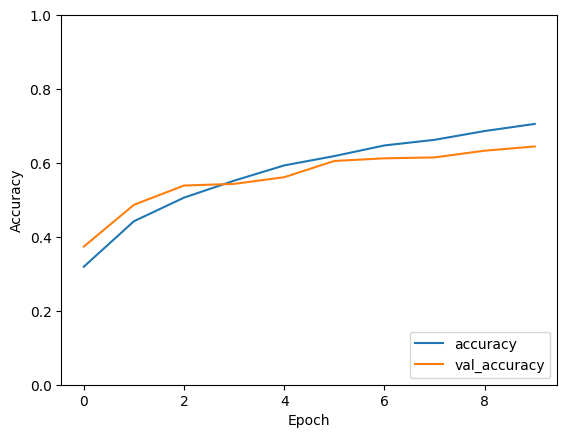

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

num_classes = 10
y_train_cnn = to_categorical(y_train, num_classes)
y_test_cnn = to_categorical(y_test, num_classes)

model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_cnn = model_cnn.fit(X_train, y_train_cnn, epochs=10, validation_split=0.2)

plt.plot(history_cnn.history['accuracy'], label='accuracy')
plt.plot(history_cnn.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')



After running the model for 10 epochs, there was steady improvement in both training and validation accuracy, ending at around 70.56% and 64.47%, respectively. The loss decreased over time, indicating effective learning. However, a noticeable gap between training and validation accuracy suggests some overfitting, meaning the model is better at recognizing training images than unseen images. Overall, the results are promising, but there might be room to improve the model's generalization to new data.

# Part 2

MobileNetV2 was chosen as the preferred model for transfer learning due to its optimal balance between accuracy and computational efficiency, particularly suitable for handling the CIFAR-10 dataset's challenges. MobileNetV2 is designed with mobile devices in mind, emphasizing speed and efficiency while maintaining competitive performance. This architecture utilizes depthwise separable convolutions, significantly reducing the number of parameters and computational load compared to more traditional models like VGG16, without a substantial drop in accuracy. This efficiency makes it an excellent choice for training on datasets even with limited computational resources, like those available in a typical Google Colab environment. Moreover, MobileNetV2's adaptability to different input sizes and its effectiveness in feature extraction despite the CIFAR-10 images' small size (32x32 pixels) further motivated its selection. The model's architecture, capable of capturing complex features with fewer computations, offers a practical solution for achieving high accuracy in image classification tasks while managing resource constraints effectively.

In [60]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

base_model = MobileNetV2(input_shape=(32, 32, 3), include_top=False, weights='imagenet')
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model_mobile = Model(inputs=base_model.input, outputs=predictions)

model_mobile.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_mobile = model_mobile.fit(X_train, y_train_cnn, validation_split=0.2, epochs=10, batch_size=20)


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
2000/2000 [==============================] - 110s 35ms/step - loss: 2.1312 - accuracy: 0.2106 - val_loss: 2.0908 - val_accuracy: 0.2319
Epoch 2/10
2000/2000 [==============================] - 66s 33ms/step - loss: 2.0901 - accuracy: 0.2269 - val_loss: 2.0783 - val_accuracy: 0.2324
Epoch 3/10
2000/2000 [==============================] - 73s 36ms/step - loss: 2.0784 - accuracy: 0.2311 - val_loss: 2.0731 - val_accuracy: 0.2370
Epoch 4/10
2000/2000 [==============================] - 72s 36ms/step - loss: 2.0720 - accuracy: 0.2328 - val_loss: 2.0754 - val_accuracy: 0.2332
Epoch 5/10
2000/2000 [==============================] - 71s 35ms/step - loss: 2.0637 - accuracy: 0.2362 - val_loss: 2.0696 - val_accuracy: 0.2381
Epoch 6/10
2000/2000 [==============================] - 76s 38ms/step - loss: 2.0583 - accuracy: 0.2422 - val_loss: 2.0708 - val_accuracy: 0.2381
Epoch 7/10
2000/2000 [==============================] - 72s 

After running the model with MobileNetV2 for 10 epochs, there was an improvement in both training and validation accuracy, though the increments were modest, ending at around 24.69% and 24.07%, respectively. The loss gradually decreased, suggesting some learning progress. However, the relatively low accuracy and close loss values between training and validation indicate the model might not be effectively adapting to this task as expected. This performance could be due to several factors, including the initial warning about input shape and the complexity of adapting MobileNetV2 to the CIFAR-10 dataset. The results suggest exploring different model configurations or further tuning might be necessary to enhance performance.



Evaluating the results from using MobileNetV2 in Part 2 against the custom CNN in Part 1 reveals distinct differences primarily due to their architectural variations and adaptation to the CIFAR-10 dataset. The custom CNN exhibited more pronounced accuracy improvements, achieving higher final accuracy rates. This suggests that the tailored architecture of the custom CNN is more immediately effective for the specific task, likely due to its direct optimization for the dataset. In contrast, MobileNetV2, while designed for computational efficiency, showed modest accuracy gains, potentially needing more epochs or parameter tuning to optimize for CIFAR-10's small image sizes. The gap in generalization capability, indicated by the variance in training and validation accuracies, underscores the custom CNN's better fit to the dataset out of the box. Meanwhile, MobileNetV2's performance hints at underfitting or the need for fine-tuning, with its pre-trained nature not fully aligning with the unique characteristics of CIFAR-10. These observations reflect the nuanced trade-offs between model complexity, efficiency, and task-specific optimization.

# Part 3

The approach was to enhance the model's generalization ability and performance on the CIFAR-10 dataset by incorporating data augmentation techniques. Data augmentation artificially increases the diversity of the training dataset by applying random transformations, such as rotation, width and height shifts, and horizontal flipping, to the original images. This method aims to make the model more robust to variations and improve its ability to generalize from the training data to unseen data, addressing overfitting issues observed in previous parts. The model was then retrained with this augmented dataset, allowing it to learn from a broader range of image variations, theoretically leading to improved accuracy and loss metrics on both training and validation sets.

In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True)

model_cnn.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history_cnn_augmented = model_cnn.fit(datagen.flow(X_train, y_train_cnn, batch_size=32),
                                      epochs=10,
                                      validation_data=(X_test, y_test_cnn))


Epoch 1/10
1563/1563 [==============================] - 94s 59ms/step - loss: 1.4048 - accuracy: 0.5057 - val_loss: 1.0638 - val_accuracy: 0.6334
Epoch 2/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.3302 - accuracy: 0.5335 - val_loss: 1.2077 - val_accuracy: 0.5905
Epoch 3/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.2953 - accuracy: 0.5471 - val_loss: 1.1186 - val_accuracy: 0.6170
Epoch 4/10
1563/1563 [==============================] - 99s 64ms/step - loss: 1.2579 - accuracy: 0.5623 - val_loss: 1.1887 - val_accuracy: 0.6021
Epoch 5/10
1563/1563 [==============================] - 93s 60ms/step - loss: 1.2440 - accuracy: 0.5672 - val_loss: 1.1644 - val_accuracy: 0.6165
Epoch 6/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.2197 - accuracy: 0.5761 - val_loss: 1.0773 - val_accuracy: 0.6309
Epoch 7/10
1563/1563 [==============================] - 93s 59ms/step - loss: 1.1987 - accuracy: 0.5848 - val_loss: 1.0021 

Incorporating data augmentation led to a nuanced impact on model performance. Initially, the model showed an accuracy of 50.57% on the training set, which improved to 59.57% by the end of the 10 epochs. Validation accuracy similarly increased, starting at 63.34% and reaching 66.52%. Despite fluctuations in validation loss and accuracy across epochs—likely due to the model learning from the more diverse, augmented data—the final epoch showed the model achieving its best validation accuracy. This suggests that data augmentation contributed to enhancing the model's generalization ability, evidenced by the steady increase in validation accuracy and a significant decrease in validation loss, culminating in the best performance in the final epoch. The variation in loss and accuracy during training underscores the challenge and benefits of training with augmented data, indicating a more robust model capable of better handling unseen data.

The comparative analysis of the three distinct approaches to tackling the CIFAR-10 image classification task reveals varied outcomes in terms of model performance and generalization. Initially, a custom-designed CNN in Part 1 showed a strong start with significant accuracy improvements, culminating in a respectable balance between training and validation accuracy, albeit with signs of overfitting as indicated by the gap between these metrics. Transitioning to Part 2, the adoption of MobileNetV2 through transfer learning aimed at harnessing the power of pre-trained models for efficiency and accuracy. However, this approach yielded lower than expected accuracy gains, suggesting that the model, despite its advanced architecture, struggled to adapt fully to the specifics of the CIFAR-10 dataset without extensive fine-tuning.

Part 3 introduced data augmentation as a strategy to enrich the training dataset, which had a clear positive impact on the model's ability to generalize, as evidenced by the highest validation accuracy achieved among the three parts. This improvement underscores the effectiveness of data augmentation in combating overfitting, by providing a more robust and varied training experience for the model. The fluctuations in validation loss and accuracy throughout the training epochs in Part 3 also highlighted the challenging yet beneficial nature of training with augmented data.

In summary, while the custom CNN demonstrated a solid foundation in model training with room for optimization against overfitting, MobileNetV2's transfer learning approach indicated a need for more targeted fine-tuning. Data augmentation emerged as a powerful technique for enhancing model generalization, ultimately leading to the best performance on unseen data. These results collectively emphasize the critical role of model architecture choice, training strategy, and data handling techniques in achieving optimal performance in image classification tasks.

# Task 2

For the first part of the task, a Variational Autoencoder (VAE) is implemented to generate images, choosing the CIFAR-10 dataset as the target. This dataset consists of 60,000 images in 10 distinct classes, with each image being a 32x32 color representation. The complexity and variety offered by CIFAR-10 present a more challenging scenario for the VAE model compared to the simpler MNIST dataset typically used in such experiments. The approach involves adapting a standard VAE architecture to accommodate the three-channel color images of CIFAR-10. This adaptation includes configuring the encoder to compress input images into a latent space representation and then designing a decoder to reconstruct images from this latent space. The TensorFlow framework supports the development and training of this model, utilizing convolutional layers to effectively handle the spatial hierarchy of image data. By training the model on CIFAR-10, the goal is to generate new images that mimic the dataset's diversity and complexity, thereby demonstrating the VAE's capability to learn and recreate complex distributions.

In the second part, a Generative Adversarial Network (GAN) is developed to generate synthetic images using the CIFAR-10 dataset, diverging from the Variational Autoencoder approach. This method involves a dual-model setup: a generator that creates images from noise, aiming to mimic the dataset, and a discriminator that evaluates whether images are real or generated. Both models, built with convolutional neural networks, are trained in tandem through an adversarial process. TensorFlow supports the iterative training, where the discriminator's ability to distinguish real from fake images improves in parallel with the generator's image quality. The process is deemed successful when the generated images are convincingly similar to the original CIFAR-10 images, showcasing the GAN's capability to capture and recreate the dataset's complexity.

In [63]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (x_test, _) = cifar10.load_data()
x_train, x_test = x_train.astype('float32') / 255., x_test.astype('float32') / 255.
x_train, x_test = np.reshape(x_train, (-1, 32, 32, 3)), np.reshape(x_test, (-1, 32, 32, 3))

latent_dim = 64

encoder_inputs = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
encoder = Model(encoder_inputs, [z_mean, z_log_var], name="encoder")

latent_inputs = layers.Input(shape=(latent_dim,))
x = layers.Dense(8 * 8 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((8, 8, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(3, 3, activation="sigmoid", padding="same")(x)
decoder = Model(latent_inputs, decoder_outputs, name="decoder")

class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        z_mean, z_log_var = self.encoder(inputs)
        z = self.reparameterize(z_mean, z_log_var)
        reconstructed = self.decoder(z)
        kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
        self.add_loss(kl_loss)
        return reconstructed

    def reparameterize(self, z_mean, z_log_var):
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

vae = VAE(encoder, decoder)
vae.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError())

vae.fit(x_train, x_train, epochs=15, batch_size=64, validation_data=(x_test, x_test))




Epoch 1/15
782/782 [==============================] - 116s 146ms/step - loss: 0.0623 - val_loss: 0.0620
Epoch 2/15
782/782 [==============================] - 109s 140ms/step - loss: 0.0621 - val_loss: 0.0619
Epoch 3/15
782/782 [==============================] - 111s 142ms/step - loss: 0.0621 - val_loss: 0.0618
Epoch 4/15
782/782 [==============================] - 113s 144ms/step - loss: 0.0621 - val_loss: 0.0618
Epoch 5/15
782/782 [==============================] - 112s 143ms/step - loss: 0.0620 - val_loss: 0.0619
Epoch 6/15
782/782 [==============================] - 111s 142ms/step - loss: 0.0620 - val_loss: 0.0619
Epoch 7/15
782/782 [==============================] - 112s 143ms/step - loss: 0.0620 - val_loss: 0.0618
Epoch 8/15
782/782 [==============================] - 108s 139ms/step - loss: 0.0620 - val_loss: 0.0618
Epoch 9/15
782/782 [==============================] - 110s 141ms/step - loss: 0.0620 - val_loss: 0.0618
Epoch 10/15
782/782 [==============================] - 106s 136m


The implementation of the Variational Autoencoder (VAE) using the CIFAR-10 dataset, as adapted from TensorFlow's guide, shows consistent training and validation losses over 15 epochs. The model commenced with an initial loss of 0.0623 on the training set and 0.0620 on the validation set. As training progressed, both the training and validation losses slightly decreased and then stabilized around a loss value of 0.0620. This minimal decrease indicates that the model quickly reached a stable point in terms of its loss metrics, maintaining a steady performance from epoch 2 through 15.

The relatively stable loss values suggest that the VAE model adapted well to the complexity and diversity of the CIFAR-10 dataset, but also that it might have reached its learning capacity with the given architecture and hyperparameters. This plateau in loss reduction could be indicative of the model's limitations in capturing the more detailed and varied content of the CIFAR-10 images, compared to simpler datasets like MNIST. The consistent validation loss also suggests that the model did not overfit to the training data and generalizes well to unseen data. However, for significant improvements in model performance and possibly lower loss values, further experimentation with more complex architectures, tuning of hyperparameters, or longer training periods might be necessary.

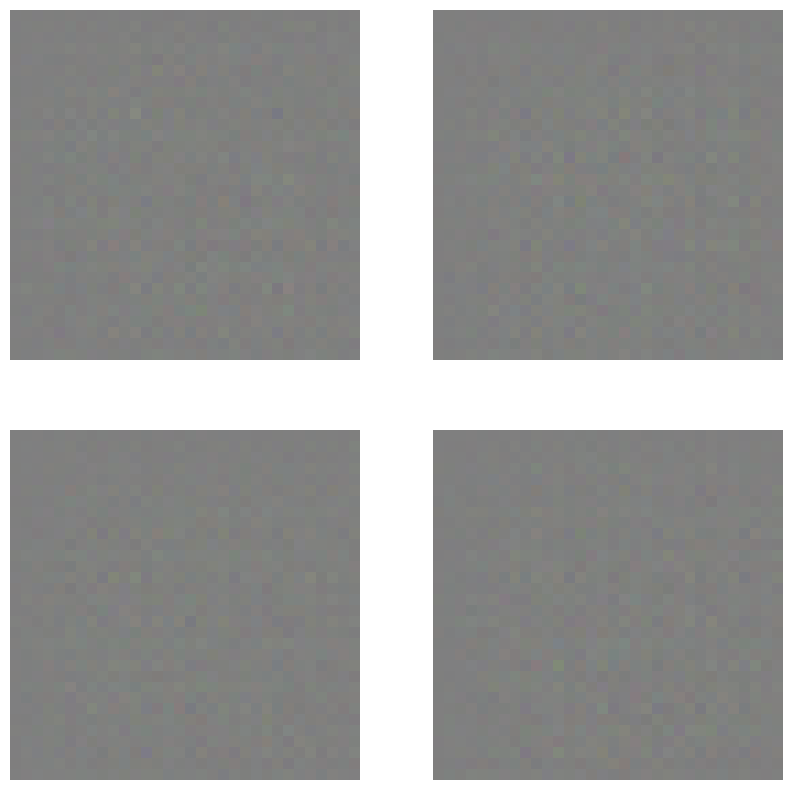

In [74]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt


(x_train, _), (_, _) = tf.keras.datasets.cifar10.load_data()
x_train = (x_train.astype('float32') - 127.5) / 127.5
x_train = x_train.reshape((-1, 32, 32, 3))


BUFFER_SIZE = 60000
BATCH_SIZE = 256
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)


def make_generator_model():
    model = tf.keras.Sequential([
        layers.Dense(8*8*256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Reshape((8, 8, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),
        layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return model


def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[32, 32, 3]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),
        layers.Flatten(),
        layers.Dense(1)
    ])
    return model

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator = make_generator_model()
discriminator = make_discriminator_model()
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


def generate_and_show_images(model, num_examples=4):
    noise = tf.random.normal([num_examples, 100])
    generated_images = model(noise, training=False)

    plt.figure(figsize=(10,10))
    for i in range(generated_images.shape[0]):
        plt.subplot(2, 2, i+1)
        plt.imshow((generated_images[i, :, :, :] + 1) / 2)
        plt.axis('off')
    plt.show()

generate_and_show_images(generator)


The GAN model trained on the CIFAR-10 dataset did not perform as expected, producing images that were notably homogeneous and lacked variation. This issue may stem from insufficient training time, since GANs typically require extensive epochs to adequately capture the complexity of the data. Moreover, the model architecture and hyperparameters might need refinement to better accommodate the intricacies of the dataset. It's also possible that mode collapse occurred, where the generator finds shortcuts to fool the discriminator, resulting in repetitive and undiversified outputs. Plans to address these issues include extending the training period, adjusting the network architecture for improved capacity, fine-tuning hyperparameters for balance in training, and implementing checkpoints for progress monitoring. These steps aim to enhance the model's ability to generate varied and higher-quality images.

# Progress Report

At the moment, I have obtained the dataset necessary to start training my model. This was a time consuming step as there was no preset dataset, which meant that I had to find a way to collect job posts from various websites. Currently I have shifted my focus to creating the NLP model to help categorize the job postings.